In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Reading our dataset

In [ ]:
df = pd.read_csv('bank-full.csv',sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


#### job questions:
--correlation plot
-count bar for the job column
-the most job title subscribed to this campaign
default:
-count plot 
- 

## Data investigation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### Checking values in each column

In [ ]:
for column in df.columns:
  print(f"{column} : {df[column].unique()}")

age : [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
job : ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital : ['married' 'single' 'divorced']
education : ['tertiary' 'secondary' 'unknown' 'primary']
default : ['no' 'yes']
balance : [ 2143    29     2 ...  8205 14204 16353]
housing : ['yes' 'no']
loan : ['no' 'yes']
contact : ['unknown' 'cellular' 'telephone']
day : [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
duration : [ 261  151   76 ... 1298 1246 1556]
campaign : [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 

replacing 'unknown' and '...' by nan

In [ ]:
df.replace(['unknown','...'],np.nan, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44923 non-null  object
 2   marital    45211 non-null  object
 3   education  43354 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    32191 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   8252 non-null   object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
#pdays have nageative values
df['pdays'] = abs(df['pdays'])
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,41.832563,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,99.456849,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
df.age.min()

18

In [ ]:
df.age.max()

95

### Adding column season

In [ ]:
def season(month):# 'may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep'
  if month in [ 'dec' ,'jan' ,'feb']:
    return 'winter'
  elif month in [ 'mar', 'apr' ,'may']:
    return 'spring'
  elif month in [  'jun', 'jul', 'aug']:
    return 'summer'
  else:
    return 'autumn'
df['season'] = df.month.apply(season)

### Change column duration unit from seconds to hours

In [ ]:
df['duration'] = df['duration']/60
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,season
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,4.350000,1,1,0,NaN,no,spring
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,2.516667,1,1,0,NaN,no,spring
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,1.266667,1,1,0,NaN,no,spring
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,1.533333,1,1,0,NaN,no,spring
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,3.300000,1,1,0,NaN,no,spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,16.283333,3,1,0,NaN,yes,autumn
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,7.600000,2,1,0,NaN,yes,autumn
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,18.783333,5,184,3,success,yes,autumn
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,8.466667,4,1,0,NaN,no,autumn


### Data binning for column age

In [ ]:
bins = [0, 20, 30 , 40 , 50,60,70, 100]
labels = ['under age', "20's", "30's" , "40's" , "50's","60's","other"]
df['age_level'] = pd.cut(x = df['age'], bins = bins, labels = labels, include_lowest = True).astype('category')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,season,age_level
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,4.350000,1,1,0,NaN,no,spring,50's
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,2.516667,1,1,0,NaN,no,spring,40's
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,1.266667,1,1,0,NaN,no,spring,30's
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,1.533333,1,1,0,NaN,no,spring,40's
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,3.300000,1,1,0,NaN,no,spring,30's
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,16.283333,3,1,0,NaN,yes,autumn,50's
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,7.600000,2,1,0,NaN,yes,autumn,other
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,18.783333,5,184,3,success,yes,autumn,other
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,8.466667,4,1,0,NaN,no,autumn,50's


## Exploratory Data Analysis

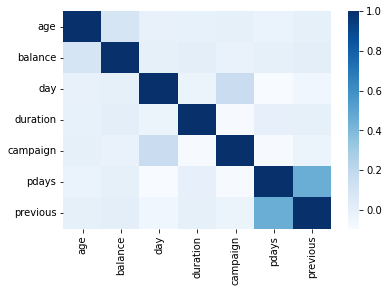

In [ ]:
sns.heatmap(df.corr(),cmap='Blues')

#### How many of our clients are married?

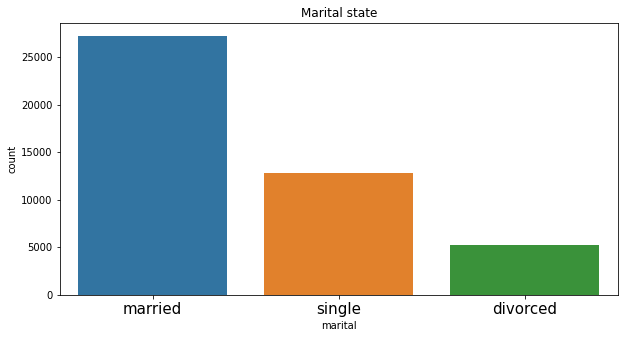

In [ ]:
# Marital state count for our clients
plt.figure(figsize=[10,5])
plt.title('Marital state')
plt.xticks(fontsize=15)
sns.countplot(x=df['marital'])
plt.savefig('marital state count')
plt.show()

In [ ]:
m= df.marital.value_counts().to_frame()
m

,marital
married,27214
single,12790
divorced,5207


In [ ]:
m['marital'] = m['marital'].apply(lambda x : x/len(df) * 100)
m

,marital
married,60.193316
single,28.289576
divorced,11.517109


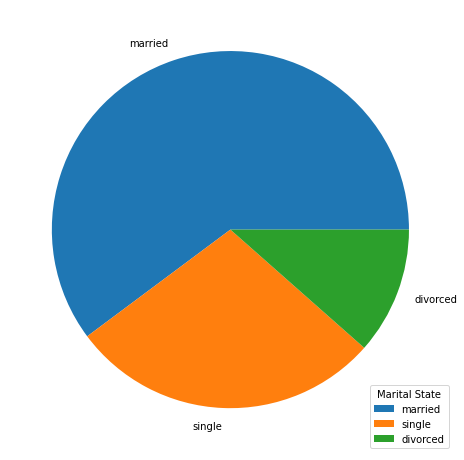

In [ ]:
m = df['marital'].value_counts()
plt.figure(figsize=[8,10])
plt.pie(m.values,labels=m.index)
plt.legend(title='Marital State')
plt.show()

#### Which category of marital state subscribe more to our campaign?

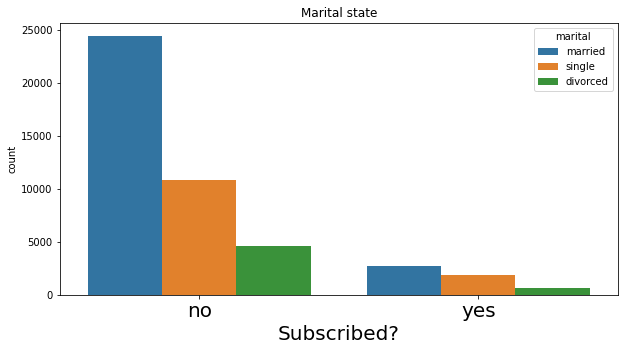

married     2755
single      1912
divorced     622
Name: marital, dtype: int64

In [ ]:
plt.figure(figsize=[10,5])
plt.title('Marital state')
plt.xticks(fontsize=20)
sns.countplot(x='y',data=df , hue='marital')
plt.xlabel('Subscribed?',fontsize=20)
plt.show()
# Most clients who subscribed are married
df[df['y']=='yes'].marital.value_counts()

In [ ]:
m = df[df['y']=='yes'].marital.value_counts().to_frame()
m['marital'] = m['marital'].apply(lambda x : x/len(df[df['y']=='yes']) * 100)
m

,marital
married,52.089242
single,36.150501
divorced,11.760257


#### What is the most category of clients whom had a housing loan?

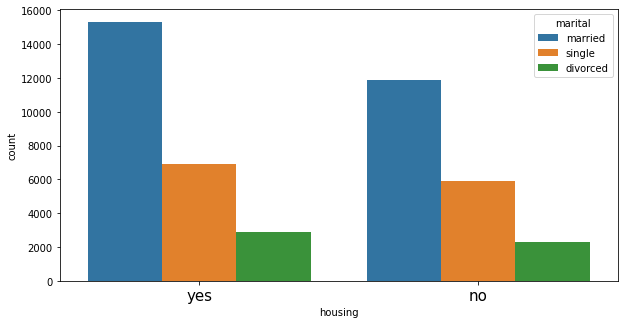

married     15321
single       6902
divorced     2907
Name: marital, dtype: int64

In [ ]:
plt.figure(figsize=[10,5])
plt.xticks(fontsize=15)
sns.countplot(x='housing',data=df , hue='marital')
plt.show()
df[df['housing']=='yes'].marital.value_counts()


In [ ]:
m=df[df['loan']=='yes'].marital.value_counts().to_frame()
m['marital'] = m['marital'].apply(lambda x : x/len(df[df['loan']=='yes']) * 100)
m

,marital
married,64.32910
single,22.95693
divorced,12.71397


#### What is the most category of clients whom had a general loan?

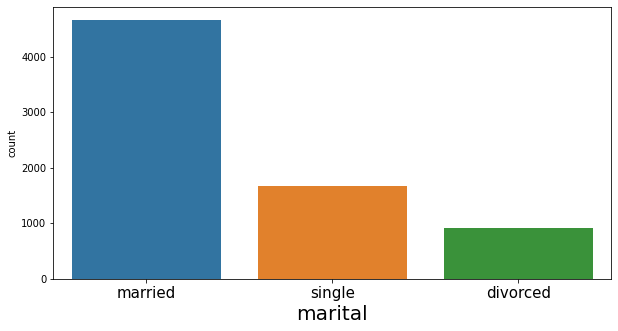

In [ ]:
plt.figure(figsize=[10,5])
plt.xticks(fontsize=15)
plt.xlabel('Loan',fontsize=20)
sns.countplot(x='marital',data=df[df['loan']=='yes'])
plt.show()


Clients had housing loans percentage?

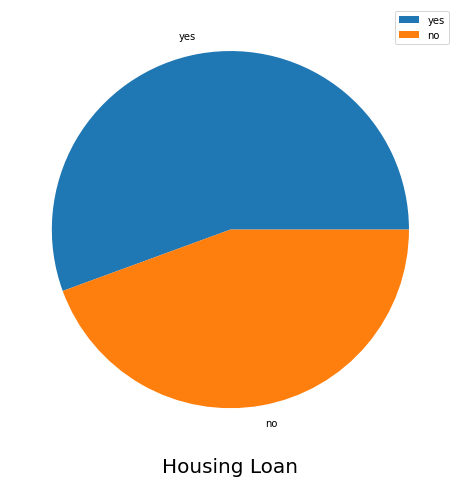

In [ ]:
plt.figure(figsize=[8,10])
plt.xticks(fontsize=15)
m=df.housing.value_counts()
plt.pie(m.values,labels=m.index)
plt.xlabel('Housing Loan',fontsize=20)
plt.legend()
plt.show()

Clients had loans percentage?

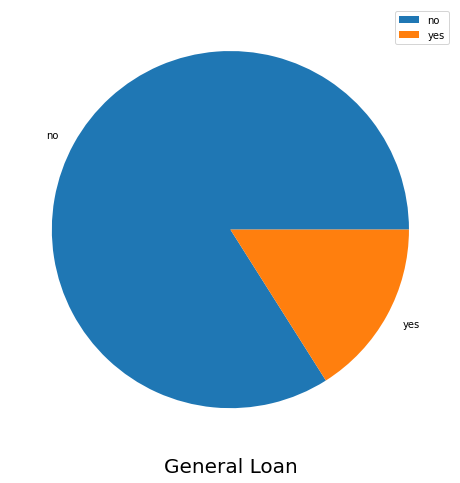

In [ ]:
plt.figure(figsize=[8,10])
plt.xticks(fontsize=15)
m=df.loan.value_counts()
plt.pie(m.values,labels=m.index)
plt.xlabel('General Loan',fontsize=20)
plt.legend()
plt.show()

#### What is the average age of our clients?

Age pie chart

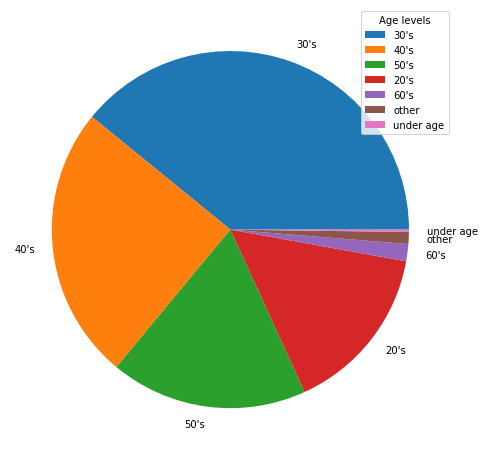

In [ ]:
m = df['age_level'].value_counts()
plt.figure(figsize=[8,10])
plt.pie(m.values , labels=m.index )
plt.legend(title='Age levels')
plt.show()

In [ ]:
m_df = m.to_frame()
m_df.age_level = m_df.age_level.apply(lambda x : x/len(df)*100)
m_df

,age_level
30's,39.121010
40's,24.858994
50's,17.843003
20's,15.334764
60's,1.550508
other,1.077171
under age,0.214550


#### Which age level has the most housing loans?

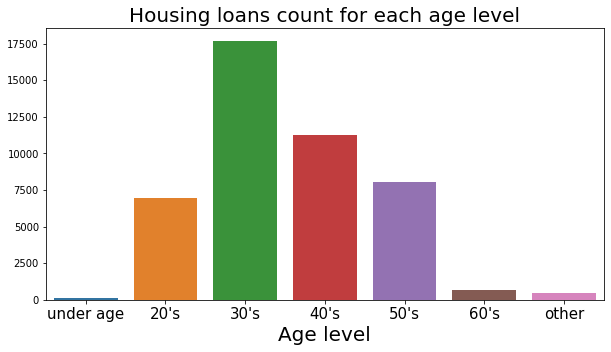

age_level
30's         17687
40's         11239
50's          8067
20's          6933
60's           701
other          487
under age       97
Name: housing, dtype: int64

In [ ]:
res = df.groupby('age_level')['housing'].count().sort_values(ascending=False)
plt.figure(figsize=[10,5])
plt.title('Housing loans count for each age level',fontsize=20)
plt.xticks(fontsize=15)
sns.barplot(x=res.index, y=res.values)
plt.xlabel('Age level',fontsize=20)
plt.show()
res

#### How many clients have already a loan and subscribed?

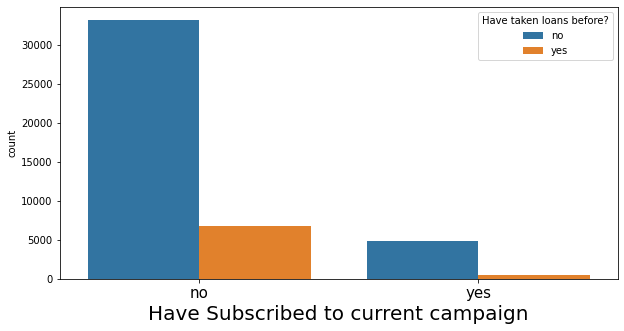

In [ ]:
plt.figure(figsize=[10,5])
plt.xticks(fontsize=15)
sns.countplot(x='y',data=df , hue='loan')
plt.xlabel('Have Subscribed to current campaign',fontsize=20)
plt.legend(title='Have taken loans before?')
plt.show()

#### Clients who have subscribed in each education level

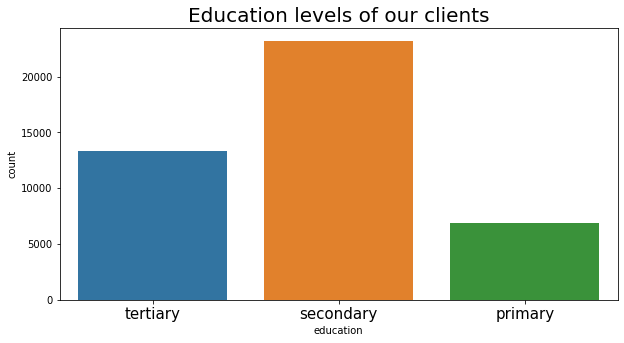

In [ ]:
plt.figure(figsize=[10,5])
plt.title('Education levels')
plt.xticks(fontsize=15)
sns.countplot(x='education',data=df)
plt.title('Education levels of our clients',fontsize=20)
plt.show()

In [ ]:
m = df.education.value_counts().to_frame()
m.education = m.education.apply(lambda x: x/len(df)*100)
m

,education
secondary,51.319369
tertiary,29.419831
primary,15.153392


#### How many clients have credit cards?

1.   List item
2.   List item



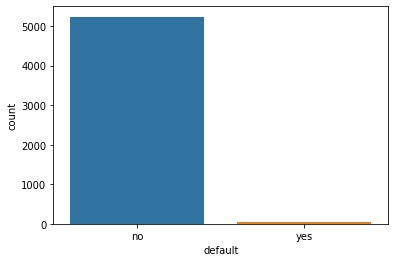

,default
no,5237
yes,52


In [ ]:
sns.countplot(x=df[df['y']=='yes']['default'])
plt.show()
df.default.value_counts()
res = df[df['y']=='yes']['default'].value_counts()
res = res.to_frame() #Most of our clients have no credit cards
res

In [ ]:
res['default'] = res['default'].apply(lambda x : x/len(df[df['y']=='yes']) *100)
res

,default
no,99.016827
yes,0.983173


#### Which contact communication type was used the most with the people who had subscribed?

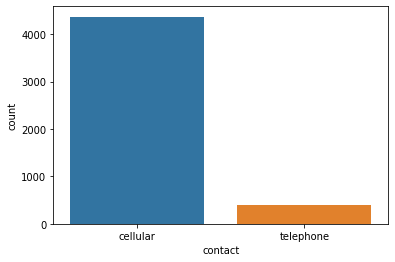

In [ ]:
sns.countplot(x=df[df['y']=='yes']['contact']) # The most effective ways is by using cellular communication

In [ ]:
m= df[df['y']=='yes'][['contact']].value_counts().to_frame()
m[0] = m[0].apply(lambda x: x/len(df[df['y']=='yes'])*100)
m

,0
contact,
cellular,82.605407
telephone,7.373795


In [ ]:
82.6+7.3

89.89999999999999

#### Which season had the most subscribtions?

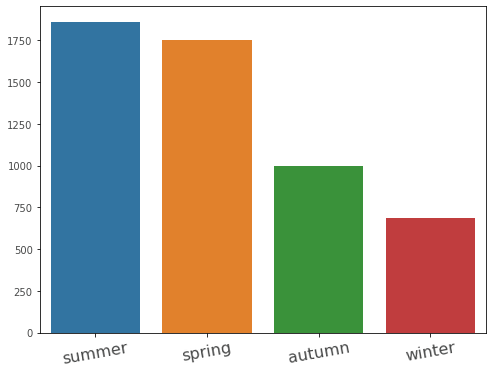

In [ ]:
plt.figure(figsize=[8,6])
res = df[df['y']=='yes'].season.value_counts().sort_values(ascending=False)
plt.xticks(fontsize=16 , rotation=10 ,color='#494A4A')
plt.yticks(color='#494A4A')
sns.barplot(x=res.index , y = res.values)
plt.show()

In [ ]:
res = res.to_frame()
res = res['season'].apply(lambda x: x/len(df[df['y']=='yes'])*100)
res

summer    35.186236
spring    33.087540
autumn    18.812630
winter    12.913594
Name: season, dtype: float64

#### which month have the bank made the most subscriptions?

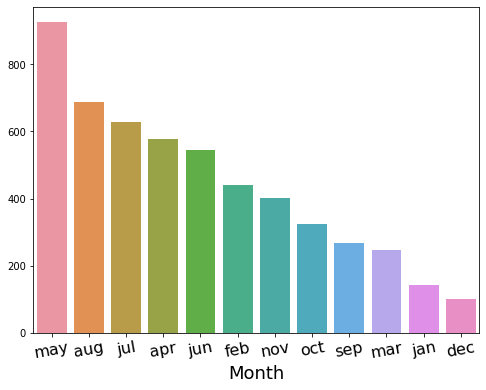

In [ ]:
m = df[df['y']=='yes'].month.value_counts().sort_values(ascending=False)
plt.figure(figsize=[8,6])
plt.xticks(fontsize=16 , rotation=10 ,color='black')
sns.barplot(x=m.index , y=m.values)
plt.xlabel('Month',fontsize=18)
plt.show()

In [ ]:
m = m.to_frame()
m = m['month'].apply(lambda x: x/len(df[df['y']=='yes'])*100)
m

may    17.489128
aug    13.008130
jul    11.854793
apr    10.909435
jun    10.323313
feb     8.338060
nov     7.619588
oct     6.107015
sep     5.086028
mar     4.688977
jan     2.684818
dec     1.890717
Name: month, dtype: float64

#### What is the average number of calls made for the clients in the previous campaign where they have agreed to subscribe?

In [ ]:
val = df[df['poutcome']=='success'][['previous']].mean().values[0]
np.floor(val)

3.0

#### does calling the client multiple times affect their decision?

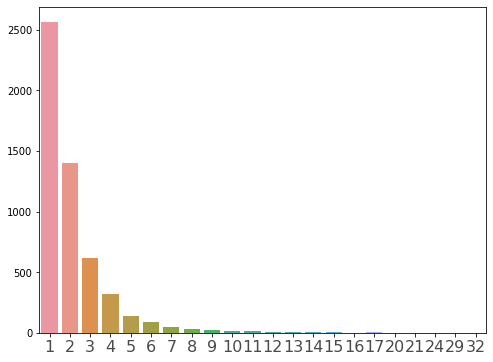

In [ ]:
res = df[df['y']=='yes']['campaign'].value_counts().sort_values(ascending=False)
plt.figure(figsize=[8,6])
plt.xticks(fontsize=16 ,color='#494A4A')
sns.barplot(x=res.index , y=res.values)
plt.show()

In [ ]:
res =res.to_frame()
res['campaign'] = res['campaign'].apply(lambda x: x/len(df[df['y']=='yes'])*100)
res['campaign'].iloc[4:].sum()

7.4116089998109285

#### Does the duration of the call affect the client's decision?

what is the minimum duration where the client accepted our offer?

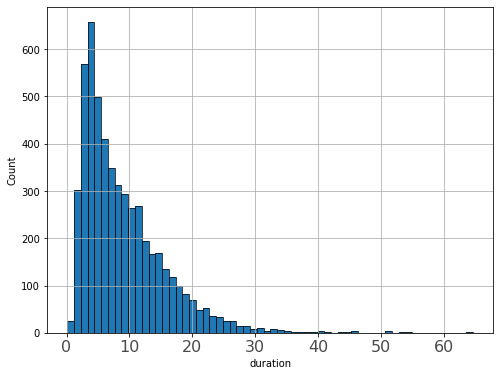

In [ ]:
plt.figure(figsize=[8,6])
plt.xticks(fontsize=16 ,color='#494A4A')
res = df[df['y']=='yes'].duration.hist(bins=60)
sns.histplot(df[df['y']=='yes'].duration, bins=60)
plt.show()

what is the maximum duration where the client accepted our offer?

In [ ]:
res = df[df['y']=='yes']['duration'].idxmax()
df.iloc[res]

age                  59
job          management
marital         married
education     secondary
default              no
balance            1321
housing              no
loan                 no
contact             NaN
day                   9
month               jun
duration      64.683333
campaign              3
pdays                 1
previous              0
poutcome            NaN
y                   yes
season           summer
age_level          50's
Name: 9947, dtype: object

#### What is the minimum balance that a client had when he subscribed?

In [ ]:
idx =df[df['y']=='yes']['balance'].idxmin()
df.iloc[idx]

age                     39
job          self-employed
marital            married
education         tertiary
default                 no
balance              -3058
housing                yes
loan                   yes
contact           cellular
day                     17
month                  apr
duration              14.7
campaign                 3
pdays                    1
previous                 0
poutcome               NaN
y                      yes
season              spring
age_level             30's
Name: 32713, dtype: object

#### What is the maximum balance that a client had when he subscribed?

In [ ]:
idx =df[df['y']=='yes']['balance'].idxmax()
df.iloc[idx]

#### what was the balance of our clients when they subscribed?

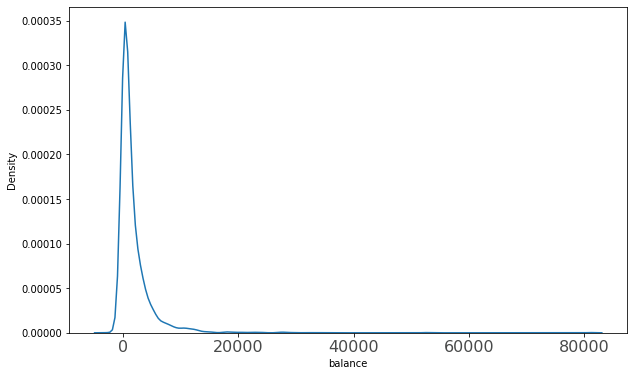

In [ ]:
plt.figure(figsize=[10,6])
plt.xticks(fontsize=16 ,color='#494A4A')
sns.kdeplot(df[df['y']=='yes'].balance)
plt.show()

#### What is the percentage of the clients whom have subscribed?

In [ ]:
res = df.y.value_counts()
res #11.698480458295547

no     39922
yes     5289
Name: y, dtype: int64

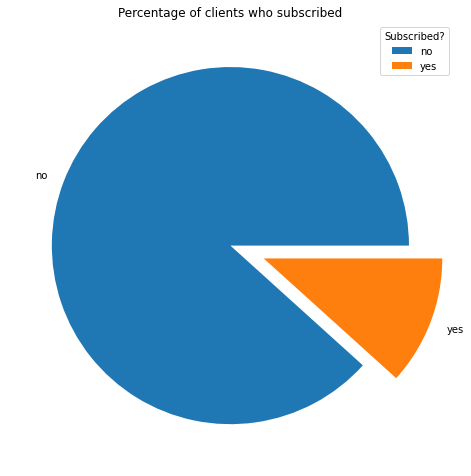

In [ ]:
plt.figure(figsize=[8,10])
plt.pie(res.values , labels=res.index, explode = [0,0.2] )
plt.title('Percentage of clients who subscribed')
plt.xticks(fontsize=16)
plt.legend(title='Subscribed?')
plt.show()

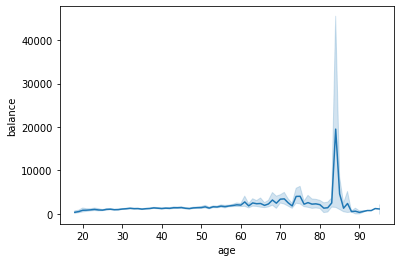

In [ ]:
sns.lineplot(x=df.age,y=df.balance)

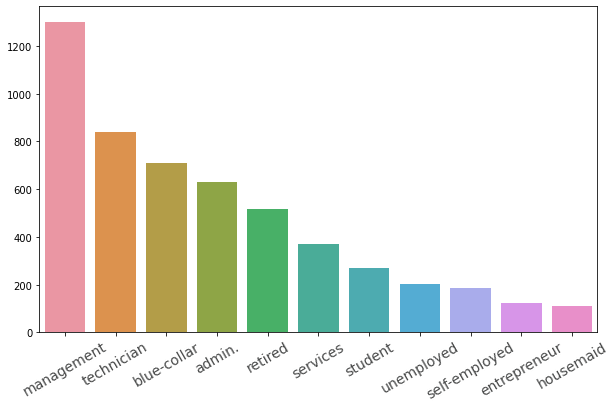

In [ ]:
res = df[df['y']=='yes']['job'].value_counts().sort_values(ascending=False)
plt.figure(figsize=[10,6])
plt.xticks(fontsize=14 ,color='#494A4A',rotation=30)
sns.barplot(x=res.index , y=res.values)
plt.show()

## Handling Missing Values

In [ ]:
df.info() 
# Missing Values in job , education , contact , poutcome

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        44923 non-null  object  
 2   marital    45211 non-null  object  
 3   education  43354 non-null  object  
 4   default    45211 non-null  object  
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  object  
 7   loan       45211 non-null  object  
 8   contact    32191 non-null  object  
 9   day        45211 non-null  int64   
 10  month      45211 non-null  object  
 11  duration   45211 non-null  float64 
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   8252 non-null   object  
 16  y          45211 non-null  object  
 17  season     45211 non-null  object  
 18  age_level  45211 non-null  category
dtypes: category(1), float64(1

In [ ]:
# from sklearn.impute import SimpleImputer
# from sklearn.impute import KNNImputer
# df['job'] =SimpleImputer(strategy = 'most_frequent').fit_transform(df['job'])